# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне.

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

продублирую сюда мои решения с контеста:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

# Закомментируйте строку ниже для запуска локально
# from coin import coin, uniform_pdf, norm_pdf, expon_pdf

def uniform(size=1, precision=30):
    # Генерация равномерных случайных величин с использованием бросания монеты
    product = np.prod(size) if isinstance(size, tuple) else size
    coin_precision = coin(precision * product).reshape((*size, precision)) if isinstance(size, tuple) else coin(precision * size).reshape((size, precision))
    conv_tup = np.insert(np.array(size).astype(int), len(size), precision) if isinstance(size, tuple) else [size, precision]
    y = np.sum(coin_precision * np.power(2, np.arange(precision - 1, -1, -1)), axis=-1)
    return y / (2 ** precision)



def normal(size=1, loc=0, scale=1, precision=30):
    # Генерация нормально распределенных случайных величин
    return loc + scale * np.cos(2 * np.pi * uniform(size, precision)) * np.sqrt(-2 * np.log(uniform(size, precision)))

def expon(size=1, lambd=1, precision=30):
    # Генерация экспоненциально распределенных случайных величин
    return -np.log(1 - uniform(size, precision)) / lambd



In [4]:
print(uniform(size = 1, precision = 40))
print(normal(precision = 20))
print(expon(size = 4, precision = 50))

[0.23390486]
[-0.15558332]
[5.10164498 0.14833577 1.40171722 1.07651035]


**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

In [69]:
uniform_sample_default = uniform(size=200)
print(uniform_sample_default)
uniform_sample_one = uniform(size=200, precision = 1)
uniform_sample_few = uniform(size=200, precision = 5)
uniform_sample_giant = uniform(size=200, precision = 60)

[0.18565745 0.79706896 0.98791425 0.60172198 0.45542726 0.6041378
 0.67597773 0.04035992 0.75214851 0.03209357 0.63178277 0.3973589
 0.23689391 0.8229994  0.08889199 0.02603579 0.94329291 0.55198575
 0.35857729 0.15547343 0.36761526 0.09531955 0.42966723 0.67056358
 0.15465121 0.80655836 0.9862357  0.63660129 0.62470598 0.51992473
 0.09699606 0.53923126 0.54345952 0.15417475 0.42021821 0.0539326
 0.45624009 0.98342612 0.60436998 0.84736386 0.61736812 0.03232579
 0.61959669 0.38756657 0.27669663 0.88774821 0.74787535 0.49901769
 0.39309272 0.37189009 0.30109588 0.40962657 0.18730815 0.58450211
 0.21375522 0.47229114 0.84819305 0.68828014 0.11933449 0.11710329
 0.40168819 0.44303169 0.97391882 0.57554756 0.46047145 0.07219845
 0.35082141 0.48953355 0.4333117  0.46546718 0.84800551 0.87932303
 0.16234002 0.8161182  0.11885078 0.2916883  0.51501793 0.49445487
 0.96220385 0.0111903  0.99756415 0.44609074 0.74651417 0.83501493
 0.41423676 0.42132299 0.4212307  0.13684973 0.99943684 0.0428065

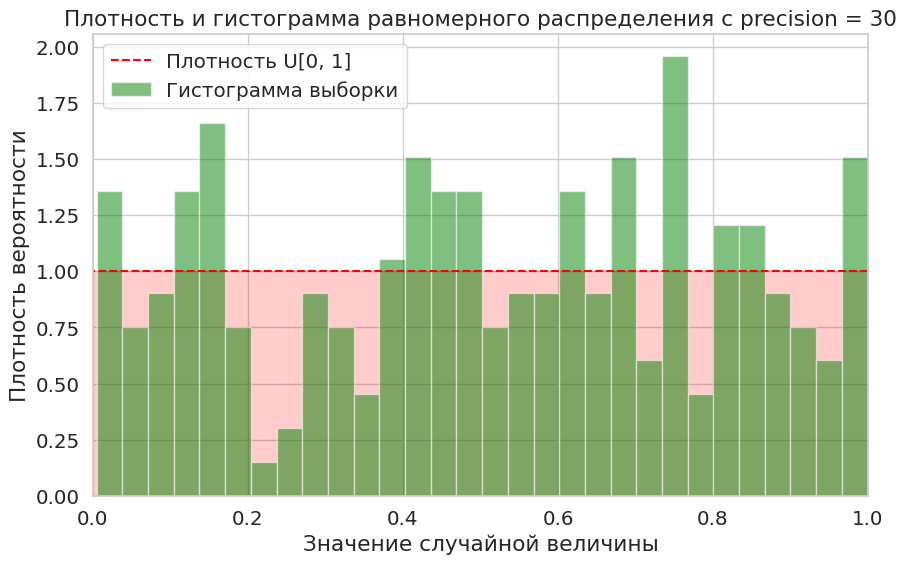

In [91]:
x_uniform = np.linspace(-0.25, 1.25, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_uniform, np.ones_like(x_uniform), color='red', linestyle='--', label='Плотность U[0, 1]')
plt.fill_between(x_uniform, np.zeros_like(x_uniform), np.ones_like(x_uniform), alpha=0.2, color='red')

# Построение гистограммы
plt.hist(uniform_sample_default, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')

plt.title('Плотность и гистограмма равномерного распределения c precision = 30')
plt.xlabel('Значение случайной величины')
plt.xlim(0,1)
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

данный график показывает, что значения нашего кастомного равномерного распределения близки к настоящим

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

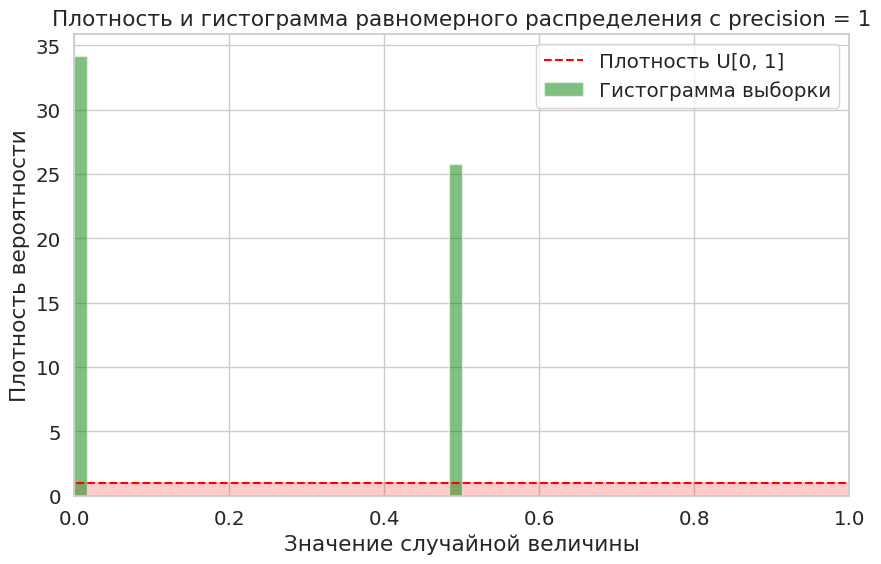

In [92]:
x_uniform = np.linspace(-0.25, 1.25, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_uniform, np.ones_like(x_uniform), color='red', linestyle='--', label='Плотность U[0, 1]')
plt.fill_between(x_uniform, np.zeros_like(x_uniform), np.ones_like(x_uniform), alpha=0.2, color='red')

# Построение гистограммы
plt.hist(uniform_sample_one, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')

plt.title('Плотность и гистограмма равномерного распределения c precision = 1')
plt.xlabel('Значение случайной величины')
plt.xlim(0,1)
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

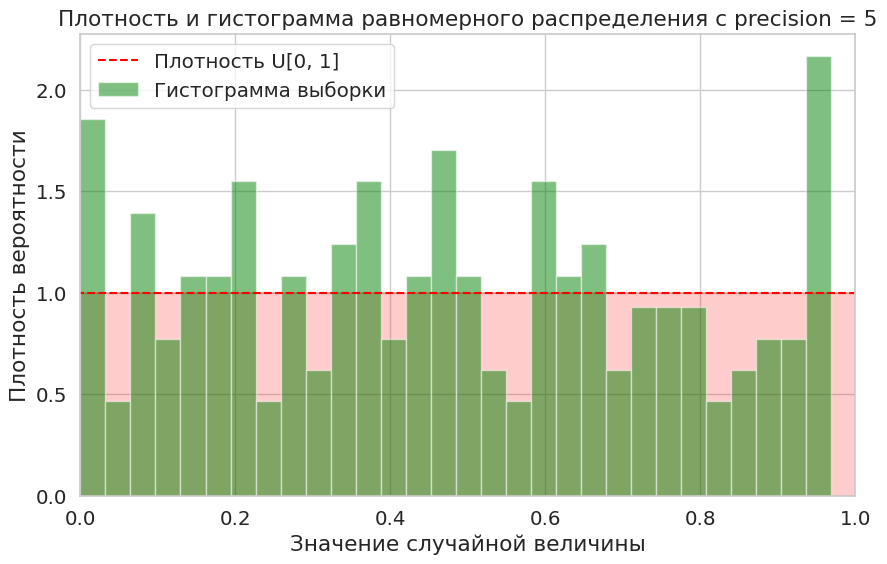

In [93]:
x_uniform = np.linspace(-0.25, 1.25, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_uniform, np.ones_like(x_uniform), color='red', linestyle='--', label='Плотность U[0, 1]')
plt.fill_between(x_uniform, np.zeros_like(x_uniform), np.ones_like(x_uniform), alpha=0.2, color='red')

# Построение гистограммы
plt.hist(uniform_sample_few, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')

plt.title('Плотность и гистограмма равномерного распределения c precision = 5')
plt.xlabel('Значение случайной величины')
plt.xlim(0,1)
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

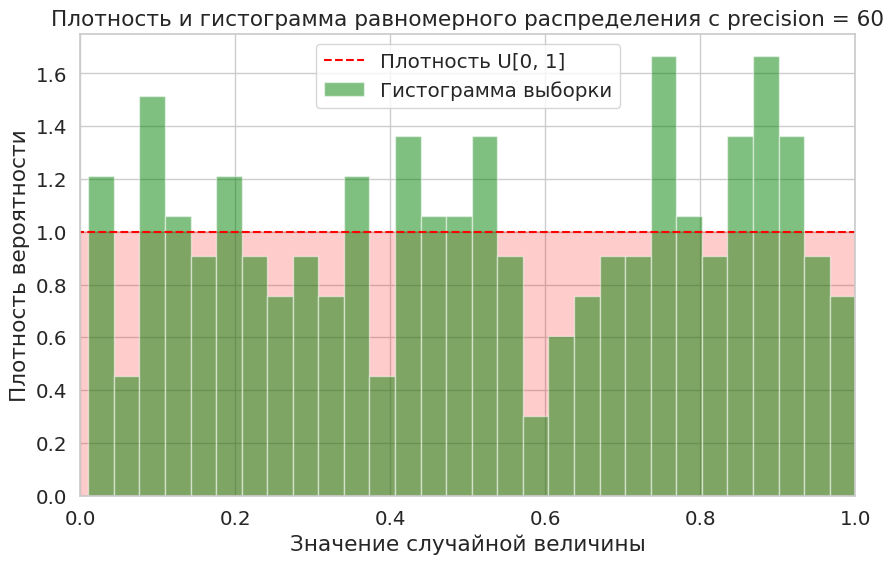

In [94]:
x_uniform = np.linspace(-0.25, 1.25, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_uniform, np.ones_like(x_uniform), color='red', linestyle='--', label='Плотность U[0, 1]')
plt.fill_between(x_uniform, np.zeros_like(x_uniform), np.ones_like(x_uniform), alpha=0.2, color='red')

# Построение гистограммы
plt.hist(uniform_sample_giant, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')

plt.title('Плотность и гистограмма равномерного распределения c precision = 60')
plt.xlabel('Значение случайной величины')
plt.xlim(0,1)
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

далее для наглядности изобразим все эти графики на одном полотне чтобы видеть отличия:

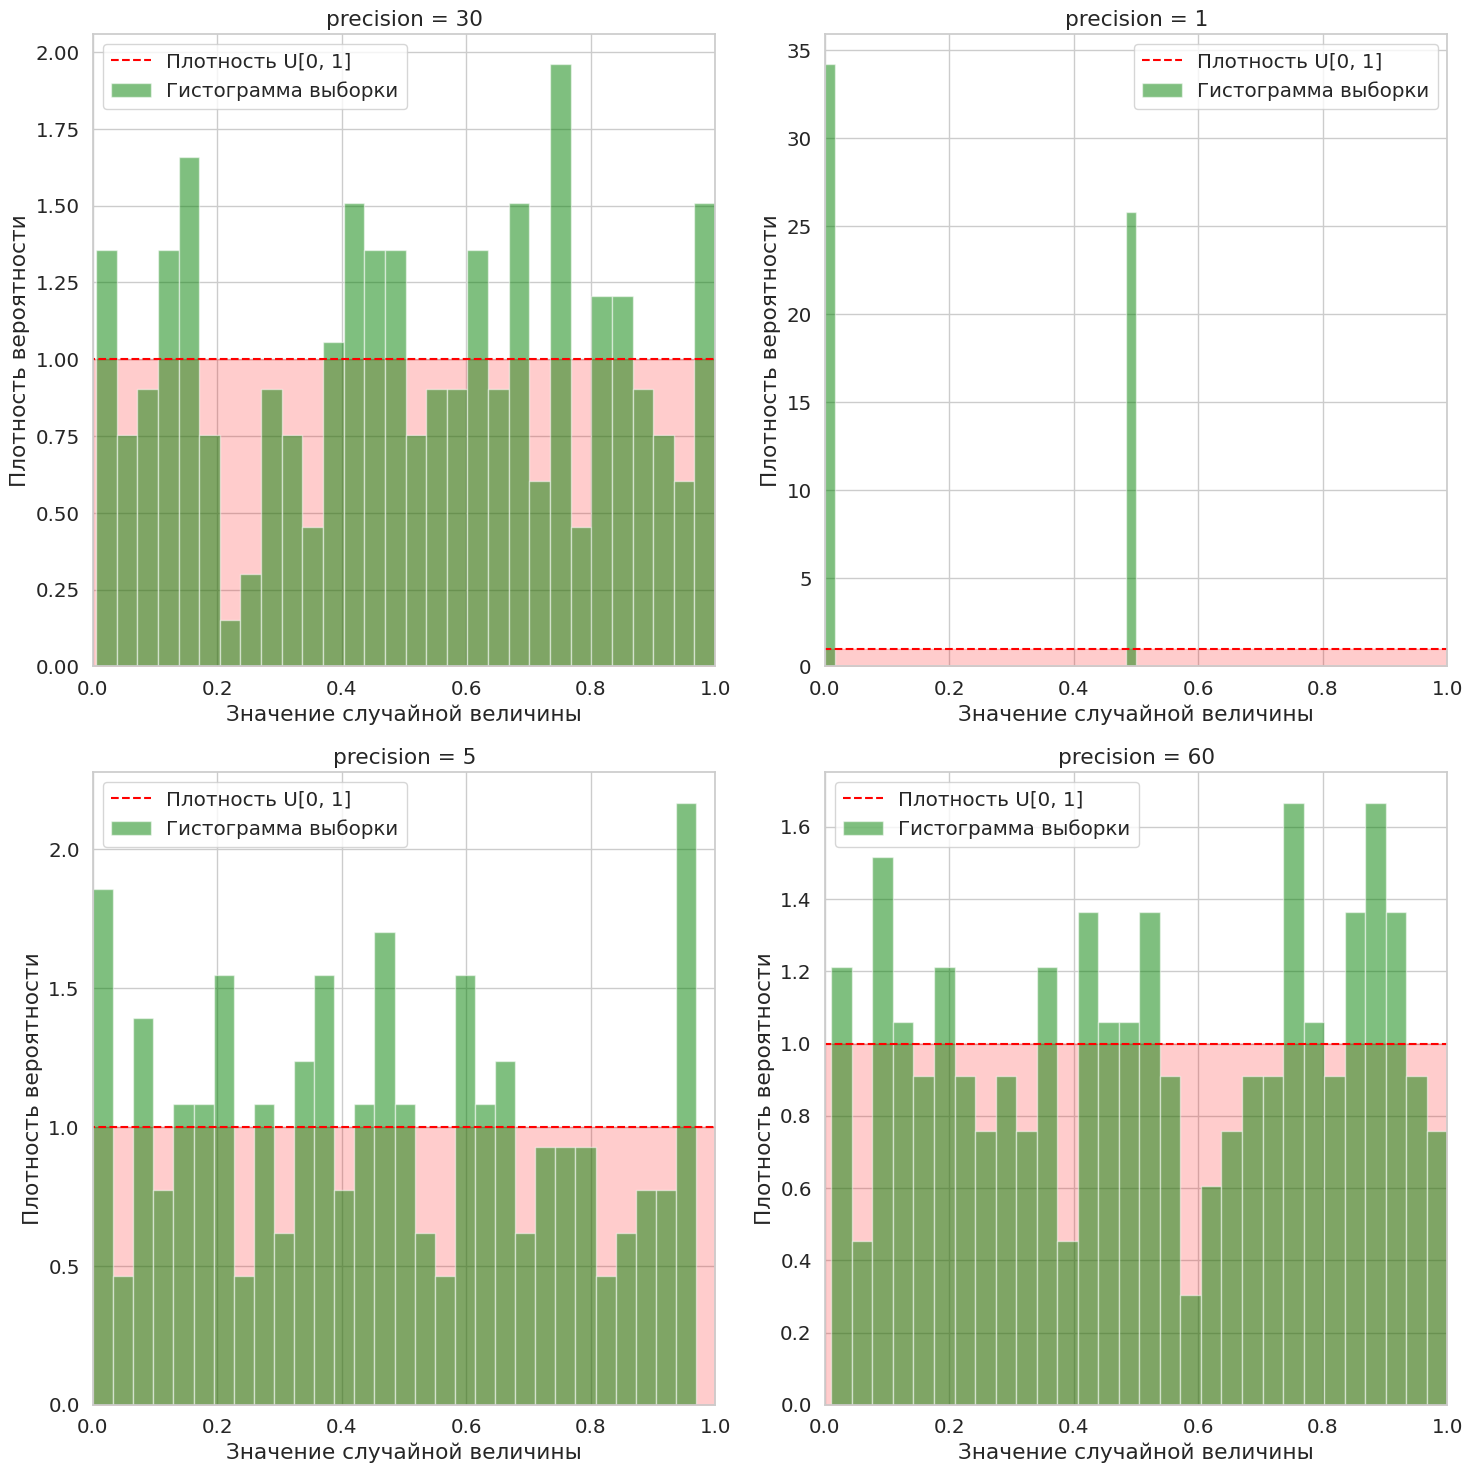

In [95]:
plt.figure(figsize=(15, 15))

# График 1: precision = 30
plt.subplot(2, 2, 1)
x_uniform = np.linspace(-0.25, 1.25, 1000)
plt.plot(x_uniform, np.ones_like(x_uniform), color='red', linestyle='--', label='Плотность U[0, 1]')
plt.fill_between(x_uniform, np.zeros_like(x_uniform), np.ones_like(x_uniform), alpha=0.2, color='red')
plt.hist(uniform_sample_default, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')
plt.title('precision = 30')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.xlim(0, 1)
plt.legend()
plt.grid(True)

# График 2: precision = 1
plt.subplot(2, 2, 2)
x_uniform = np.linspace(-0.25, 1.25, 1000)
plt.plot(x_uniform, np.ones_like(x_uniform), color='red', linestyle='--', label='Плотность U[0, 1]')
plt.fill_between(x_uniform, np.zeros_like(x_uniform), np.ones_like(x_uniform), alpha=0.2, color='red')
plt.hist(uniform_sample_one, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')
plt.title('precision = 1')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.xlim(0, 1)
plt.legend()
plt.grid(True)

# График 3: precision = 5
plt.subplot(2, 2, 3)
x_uniform = np.linspace(-0.25, 1.25, 1000)
plt.plot(x_uniform, np.ones_like(x_uniform), color='red', linestyle='--', label='Плотность U[0, 1]')
plt.fill_between(x_uniform, np.zeros_like(x_uniform), np.ones_like(x_uniform), alpha=0.2, color='red')
plt.hist(uniform_sample_few, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')
plt.title('precision = 5')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.xlim(0, 1)
plt.legend()
plt.grid(True)

# График 4: precision = 60
plt.subplot(2, 2, 4)
x_uniform = np.linspace(-0.25, 1.25, 1000)
plt.plot(x_uniform, np.ones_like(x_uniform), color='red', linestyle='--', label='Плотность U[0, 1]')
plt.fill_between(x_uniform, np.zeros_like(x_uniform), np.ones_like(x_uniform), alpha=0.2, color='red')
plt.hist(uniform_sample_giant, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')
plt.title('precision = 60')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.xlim(0, 1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Рассмотрим 4 графика выше и сделаем выводы по каждому:



*   precision = 30:
График показывает плотность равномерного распределения и гистограмму выборки, сгенерированной с использованием параметра precision = 30. Значения случайной величины близки к равномерному распределению на отрезке [0, 1].
*   precision = 1:
Гистограмма с precision = 1 имеет всего два возможных значения (0 или 1). Это происходит из-за того, что при малом значении precision генерируемые числа могут принимать только ограниченный набор дискретных значений.
*   precision = 10:
При увеличении precision до 10, гистограмма начинает более равномерно заполняться значениями между 0 и 1. Однако наблюдаются промежутки, в которых график очень скачет, то есть распределение вышло не таким уж и равномерным как хотелось
*   precision = 50:
Гистограмма с precision = 50 становится более гладкой и напоминает плотность равномерного распределения на отрезке [0, 1]. Это происходит потому, что увеличение precision позволяет генерировать более точные значения, которые лучше соответствуют непрерывной равномерной плотности.


Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

In [96]:
normal_sample = normal(size=200)
normal_sample

array([ 8.94329684e-01,  8.92582361e-01,  3.14484960e-01, -6.33797539e-01,
       -6.61618358e-01,  4.63267601e-01,  1.15249183e-01, -1.27941606e-01,
        1.41631618e+00,  1.74448982e+00,  3.63988521e-01,  7.96714841e-01,
        3.78579142e-01,  8.24878434e-01, -6.52058863e-01,  1.50098986e+00,
       -5.29383910e-01, -8.81327981e-01, -1.27764556e+00, -1.82083080e+00,
        3.20457322e-01,  3.58661466e-01,  7.84515042e-01,  1.26993988e+00,
        2.30661856e+00,  3.96572101e-01, -3.19131731e-01, -3.04661632e-01,
       -1.11866439e+00,  1.02534562e-02, -2.74337034e-01, -1.54299405e+00,
        1.81231099e+00, -1.40510389e+00,  1.06726789e+00, -8.89269561e-01,
        2.30406221e-01,  8.02412012e-01, -2.26313227e-01, -4.64699004e-01,
        2.78375101e-01, -1.58914348e-01, -2.09973200e+00, -1.09370001e+00,
       -4.87095874e-01,  1.64258233e+00,  2.17314893e+00, -4.20912035e-01,
        5.99743229e-01, -1.55115179e+00, -1.70205589e+00, -6.10049281e-01,
        1.51072272e-01, -

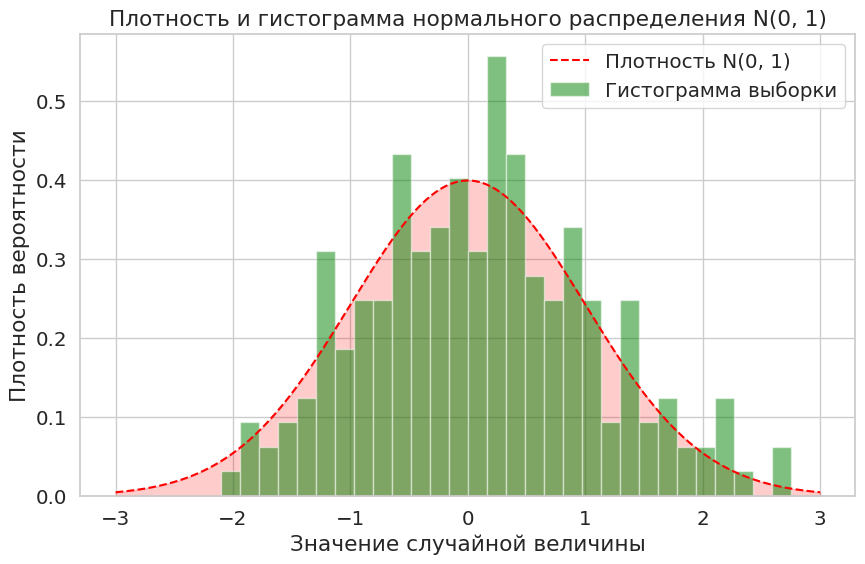

In [109]:
x_normal = np.linspace(-3, 3, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_normal, 1 / np.sqrt(2 * np.pi) * np.exp(-x_normal ** 2 / 2), color='red', linestyle='--', label='Плотность N(0, 1)')
plt.fill_between(x_normal, np.zeros_like(x_normal), 1 / np.sqrt(2 * np.pi) * np.exp(-x_normal ** 2 / 2), alpha=0.2, color='red')

# Построение гистограммы
plt.hist(normal_sample, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')

plt.title('Плотность и гистограмма нормального распределения N(0, 1)')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

можно сделать аналогичные прошлому графику выводы. полученный график показывает, что наша реализация выглядит верной

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

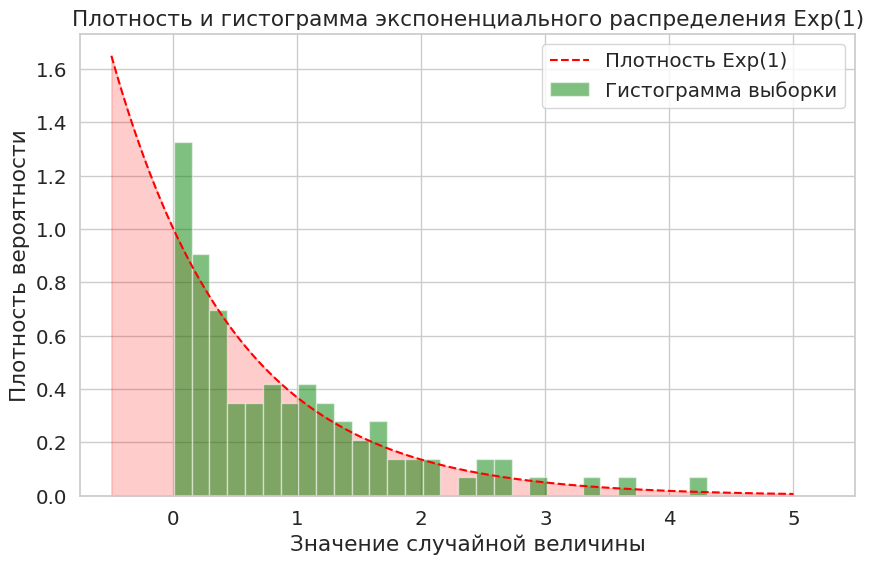

In [108]:
expon_sample = expon(size=100)

# Построение графика плотности
x_expon = np.linspace(-0.5, 5, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_expon, np.exp(-x_expon), color='red', linestyle='--', label='Плотность Exp(1)')
plt.fill_between(x_expon, np.zeros_like(x_expon), np.exp(-x_expon), alpha=0.2, color='red')

# Построение гистограммы
plt.hist(expon_sample, bins=30, density=True, color='green', alpha=0.5, label='Гистограмма выборки')

plt.title('Плотность и гистограмма экспоненциального распределения Exp(1)')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.xlim(-0.75, 5.5)
plt.legend()
plt.grid(True)
plt.show()

аналогично предыдущим двум пунктам отметим, что график выглядит правдоподобно

**Выводы:**

В процессе выполнения поставленной задачи мы убедились, что при помощи бернулиевского распределения можно реализовать равномерное и, судя по графикам, наша реализация оказывается не хуже реальных значений равномерного распределения. А с его помощью (равномерное распределение) мы смогли реализовать и нормальное, и экспоненциальное распределения, ситуация с крутостью которых аналогична.

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

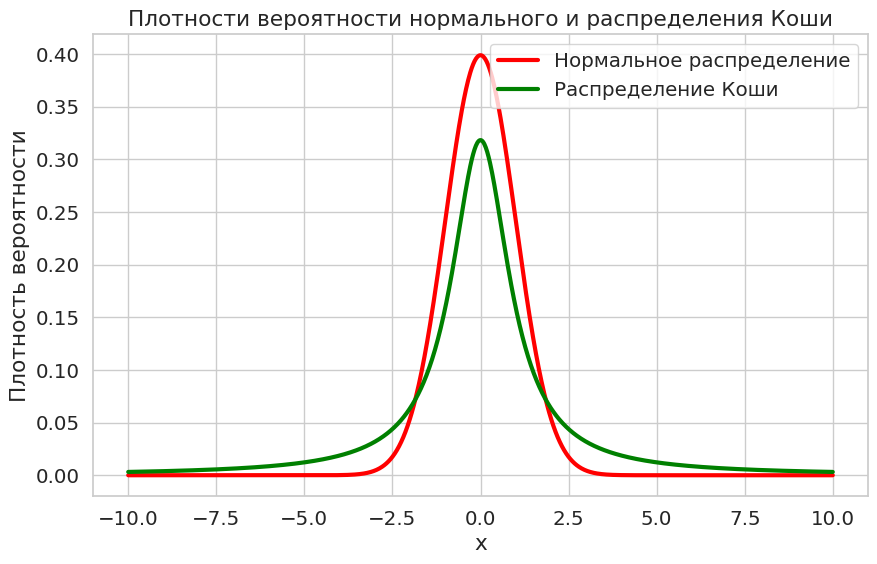

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

# Задаем параметры распределений
x = np.linspace(-10, 10, 1000)
mu = 0
sigma = 1

# Вычисляем плотности вероятности для нормального и распределения Коши
pdf_normal = norm.pdf(x, mu, sigma)
pdf_cauchy = cauchy.pdf(x, mu, sigma)

# Визуализируем плотности вероятности на одном графике
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_normal, color = "red", linewidth = 3, label='Нормальное распределение')
plt.plot(x, pdf_cauchy, color = "green", linewidth = 3, label='Распределение Коши')
plt.title('Плотности вероятности нормального и распределения Коши')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

Из графика видно, что плотность вероятности нормального распределения (красная линия) сосредоточена вокруг своего среднего значения и быстро уменьшается по мере удаления от него. В то время как плотность вероятности распределения Коши (зеленая линия) имеет тяжелые хвосты и медленно убывает при удалении от центра. Это означает, что у распределения Коши нет конечного математического ожидания, в отличие от нормального распределения. Также стоит отметить, что распределение Коши обладает более выраженными выбросами по сравнению с нормальным распределением (это мы еще раз подметим в следующем пункте задачи)

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон?

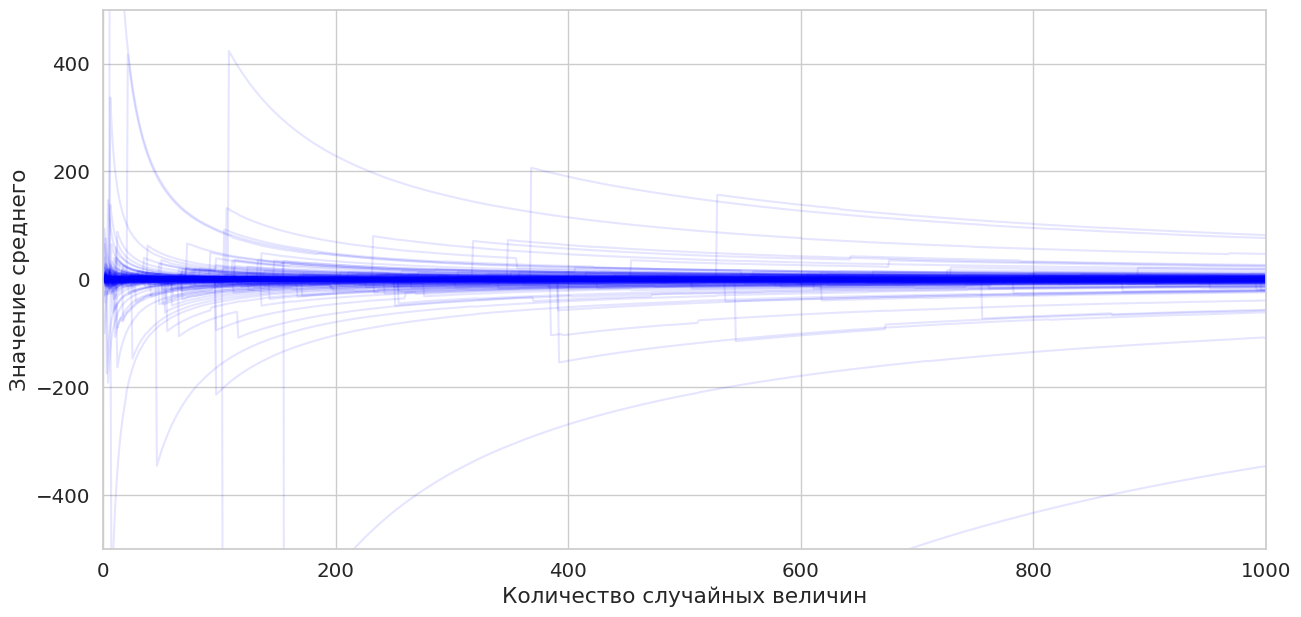

In [100]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок
samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="blue", alpha=0.1)

plt.xlabel("Количество случайных величин")
plt.ylim((-500, 500))

plt.ylabel("Значение среднего")
plt.xlim((0, size));

ЗБЧ утверждает, что среднее арифметическое большого числа независимых одинаково распределенных случайных величин сходится по вероятности к их математическому ожиданию. Однако, для распределения Коши, у которого нет конечного математического ожидания (а вот и вспомнили утверждение из пункта 1), ЗБЧ не выполняется.

Это можно заметить и на графике: с увеличением размера выборки значения среднего странно прыгают вокруг нуля. Ни при каком размере выборки нет наблюдаемой сходимости значений среднего к какому-либо конкретному числу, что подтверждает невыполнение закона больших чисел для распределения Коши.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

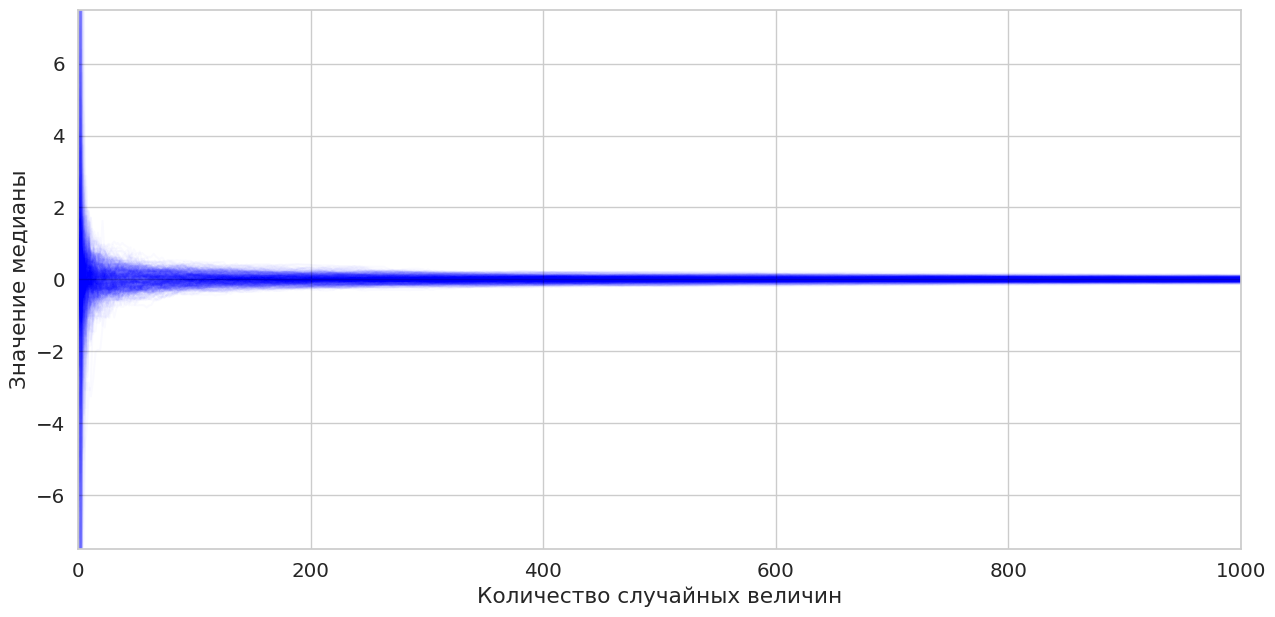

In [101]:
plt.figure(figsize=(15, 7))

# Построение графика для каждой выборки
for i in range(samples_count):
    # Генерация выборки
    samples = cauchy.rvs(size=size)
    # Вычисление накопленных медиан для каждого размера выборки
    cumulative_medians = [np.median(samples[:n]) for n in range(1, size + 1)]
    # Построение графика накопленных медиан
    plt.plot(np.arange(size) + 1, cumulative_medians, color="blue", alpha=0.02)

# Настройка осей и меток
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.ylim(bottom=-7.5, top=7.5)
plt.grid(True)
plt.show()

на этом же графике прекрасно видна тенденция: значения медианы неумолимо стремятся у нулю (синий лучик сужается)

**Вывод:**

*   Сравнение плотностей вероятности: Плотность вероятности нормального распределения сосредоточена вокруг своего среднего значения и быстро уменьшается по мере удаления от него. В то время как плотность вероятности распределения Коши имеет тяжелые хвосты и медленно убывает при удалении от центра. Это подтверждает тот факт, что у распределения Коши нет конечного математического ожидания, в отличие от нормального распределения.
*   Закон больших чисел для среднего: Для распределения Коши, не имеющего конечного математического ожидания, закон больших чисел не выполняется. Это подтверждается экспериментом, в котором наблюдается странное поведение значений среднего при увеличении размера выборки, не сходящееся к какому-либо определенному числу.
*   Закон больших чисел для выборочной медианы: Для вышеупомянутого распределения Коши мы заметили интересный факт, заключающийся в том, что несмотря на невыполнение ЗБЧ для самого распредления, распредление его медианы удовлетворяет условиям ЗБЧ






### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

зададим константы для исследования

In [127]:
K = 500
a = 0.5
accuracy = 0.02
max_size = 1000

сгенерируем сэмпл

In [128]:
samples = sps.bernoulli.rvs(p=a, size=(K, max_size))
print(samples)

[[1 1 1 ... 1 1 0]
 [0 1 0 ... 1 0 1]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 1]
 [0 1 1 ... 0 1 0]
 [0 0 1 ... 1 1 0]]


зададим нужные функции

In [133]:
# Функция для вычисления меры отклонения
def deviation_measure(n, samples, a):
  # Параметры:
  #       - n: int, размер выборки
  #       - samples: ndarray, выборка
  #       - a: float, ожидаемое значение

  #   Возвращает:
  #       - float, мера отклонения
    return np.abs(np.mean(samples[:, :n], axis=1) - a).sum() / K

# Функция для вычисления значений меры отклонения для различных размеров выборок
def deviation_values(samples, accuracy, a, n):
  # Параметры:
  #       - samples: ndarray, выборка
  #       - accuracy: float, заданная точность оценки
  #       - a: float, ожидаемое значение
  #       - n: int, максимальный размер выборки

  #   Возвращает:
  #       - ndarray, массив значений меры отклонения для различных размеров выборок
    return np.array([deviation_measure(i, samples, a) for i in range(1, n + 1)])

# Функция для нахождения наименшей выборки для выполнения заданного условия
def smallest_sample_size(samples, accuracy, a, max_n):
  # Параметры:
  #       - samples: ndarray, выборка
  #       - accuracy: float, заданная точность оценки
  #       - a: float, ожидаемое значение
  #       - max_n: int, максимальный размер выборки

  #   Возвращает:
  #       - int, наименьший размер выборки, удовлетворяющий заданной точности оценки
    deviations = deviation_values(samples, accuracy, a, max_n)
    return np.where(deviations <= accuracy)[0][0] + 1

# пример наименшего размера
smallest_n = smallest_sample_size(samples, accuracy, a, max_size)
print("Наименьший размер выборки для нужной точности:", smallest_n)


Наименьший размер выборки для нужной точности: 75


Вычисление значений меры отклонения для различных размеров выборок

In [130]:
values = deviation_values(samples, accuracy, a, max_size)

нарисуем графики

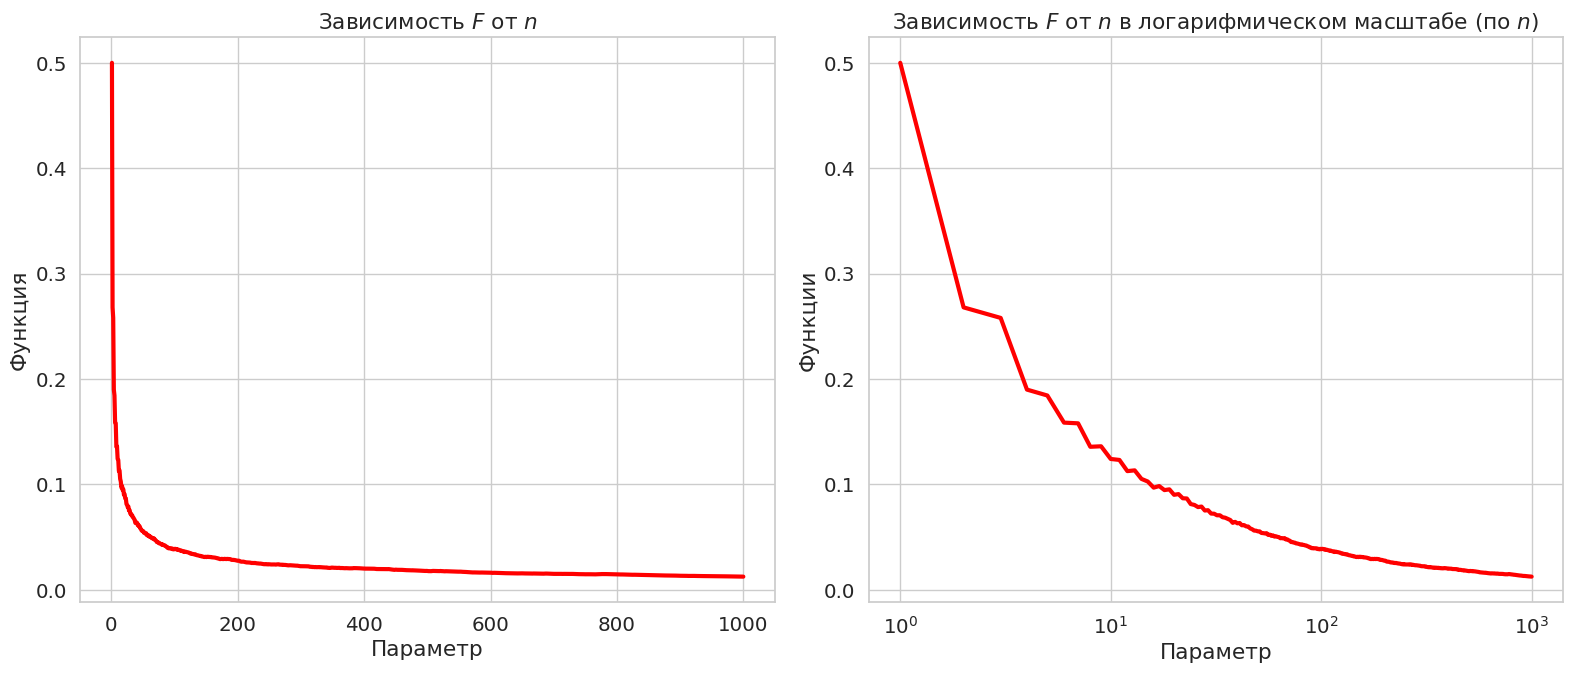

In [131]:
plt.figure(figsize=(16,7))

# первый график
plt.subplot(1, 2, 1)
plt.plot(np.arange(max_size) + 1, values, linewidth = 3, color = "red")
plt.title('Зависимость $F$ от $n$')
plt.ylabel('Функция')
plt.xlabel('Параметр')

# изобразим логарифмический масштаб
plt.subplot(1, 2, 2)
plt.plot(np.arange(max_size) + 1, values, linewidth = 3, color = "red")
plt.title('Зависимость $F$ от $n$ в логарифмическом масштабе (по $n$)')
plt.ylabel('Функции')
plt.xlabel('Параметр')
plt.xscale('log')

plt.tight_layout()
plt.show()

Графики демонстрируют, что с увеличением размера выборки точность оценки параметра a увеличивается, а ошибка уменьшается. Начальный быстрый спад функции F при малых значениях n замедляется при увеличении n, что указывает на уменьшение прироста точности с ростом выборки.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

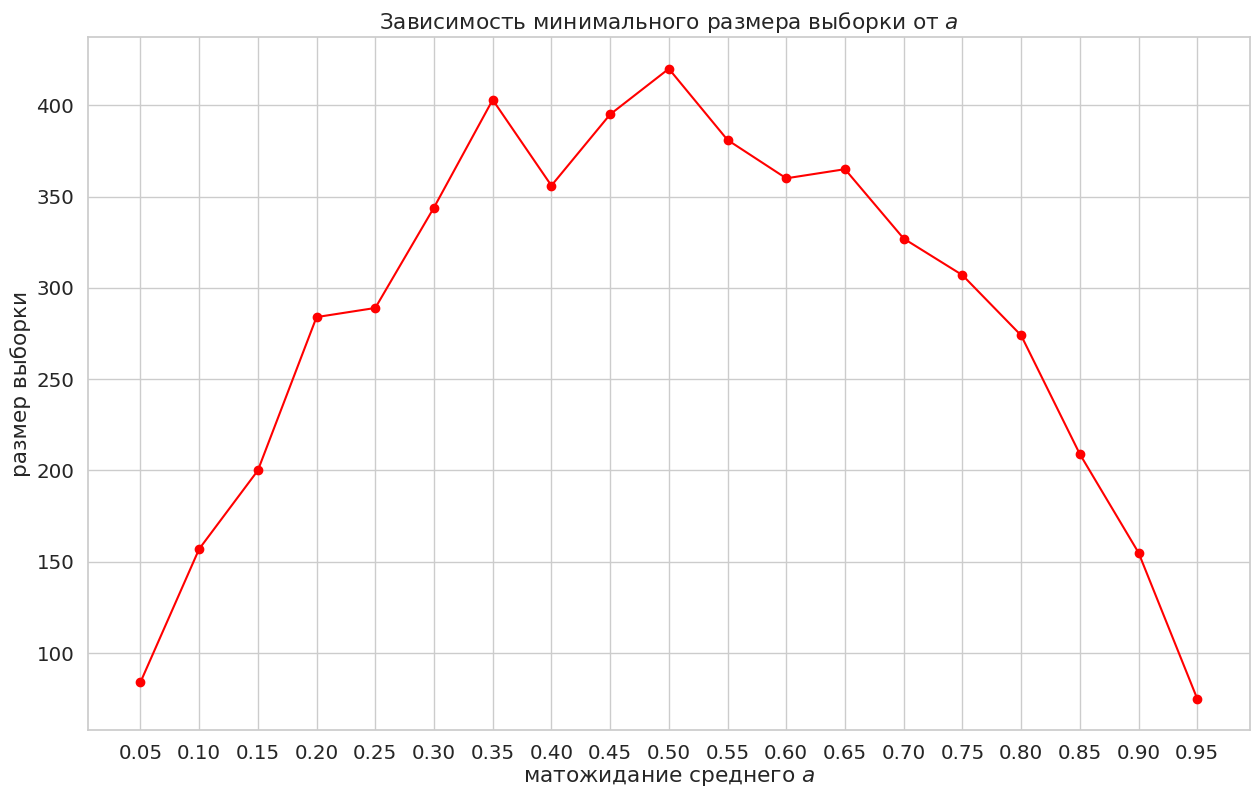

In [132]:
step = 0.05
a_range = np.arange(0.05, 1, step)
smallest_sizes = []
for a in a_range:
    samples = sps.bernoulli.rvs(p=a, size=(K, max_size))
    smallest_n = smallest_sample_size(samples, accuracy, a, max_size)
    smallest_sizes.append(smallest_n)
plt.figure(figsize=(15, 9))
plt.plot(np.arange(0.05, 1.0, step), smallest_sizes, marker='o', linestyle='-', color = 'red')
plt.title('Зависимость минимального размера выборки от $a$')
plt.xlabel('матожидание среднего $a$')
plt.ylabel('размер выборки')
plt.xticks(a_range)
plt.grid(True)
plt.show()

На графике видно, что для маленьких или больших значений параметра a требуется меньший размер выборки для достижения заданной точности оценки, для значений около 0.5 нам нужен большой размер выборки

**Выводы:**

В среднем, для того чтобы получить среднее значение, приближенное к математическому ожиданию с точностью не хуже, чем 0.02, требуется выборка из не менее чем 350-400 значений. Время на сбор данных, соответственно приблизительно оценивается полученной константой 400. Зависимость, отображенная на последнем графике, визуально напоминает график плотности нормального распределения, построенный в задании 1: как было сказано в пояснении к последнему графику, "для маленьких или больших значений параметра a требуется меньший размер выборки для достижения заданной точности оценки, для значений около 0.5 нам нужен большой размер выборки"